In [3]:
from shapely.geometry import LineString
from shapely.geometry import Point

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd


### importing the roads of europe

In [4]:
europe = gpd.read_parquet("../../../gisdata/roads/europe.parquet.gz")

### import countries polygons

In [5]:
df = gpd.read_file('../../../gisdata/countries/admin_0_countries/ne_10m_admin_0_countries.shp')

### extract the polygon of Italy

In [6]:
gdf = df.loc[df['ADMIN'] == 'Italy']

### Spatial join the roads of italy from the roads of europe and plot


In [7]:
roads = gpd.sjoin(europe, gdf, predicate='within')

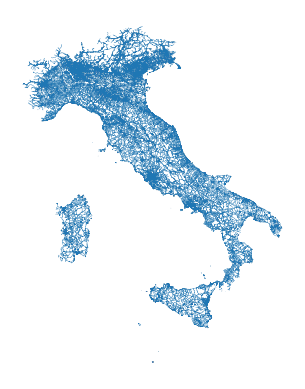

In [15]:
fig, ax = plt.subplots()
roads.plot(ax=ax, lw=0.25)
ax.axis('off')
plt.show()

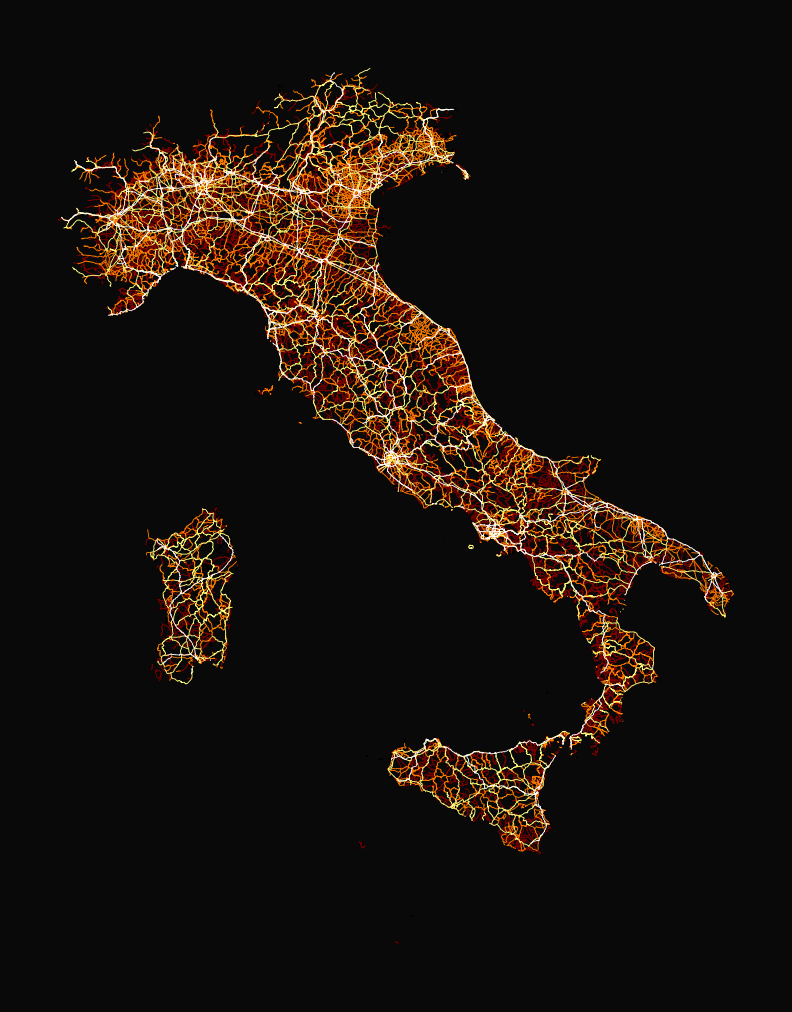

In [17]:
fig, ax = plt.subplots(facecolor='#090909', figsize=(10, 5), dpi=250)
roads.plot(ax=ax, column="GP_RTP", cmap="afmhot_r", lw=0.25)
ax.axis('off')
plt.show()

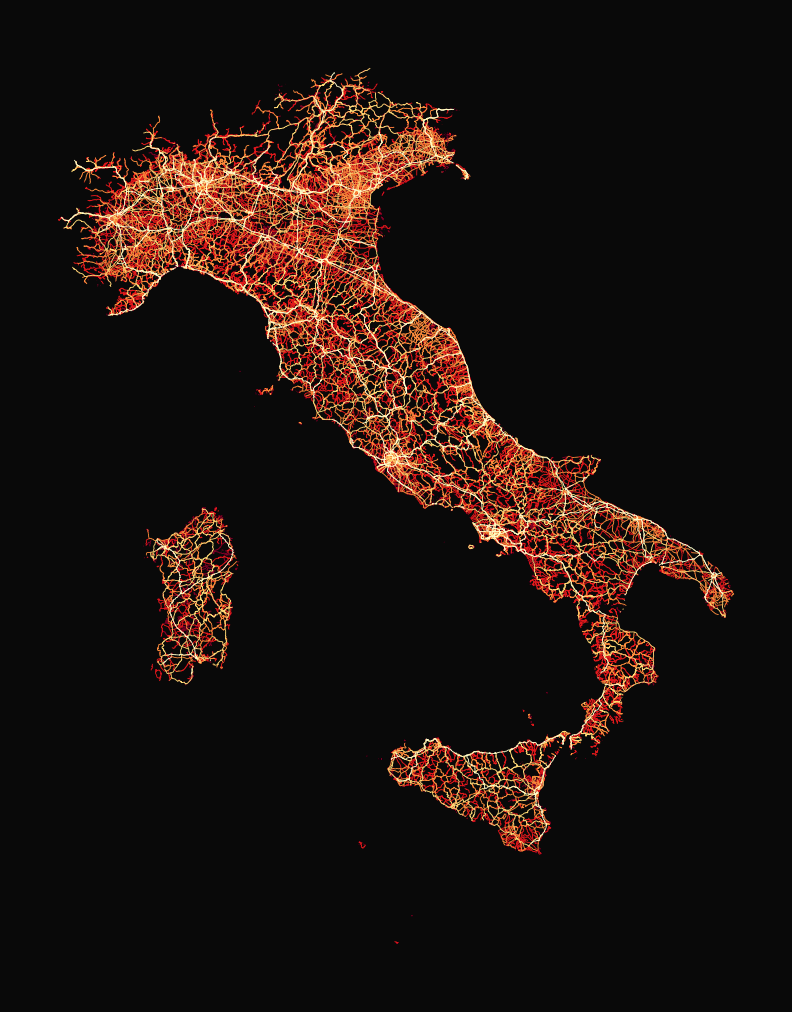

In [32]:
fig, ax = plt.subplots(facecolor='#090909', figsize=(10, 5), dpi=250)
roads.plot(ax=ax, column="GP_RTP", cmap="YlOrRd", lw=0.25)
ax.axis('off')
plt.show()

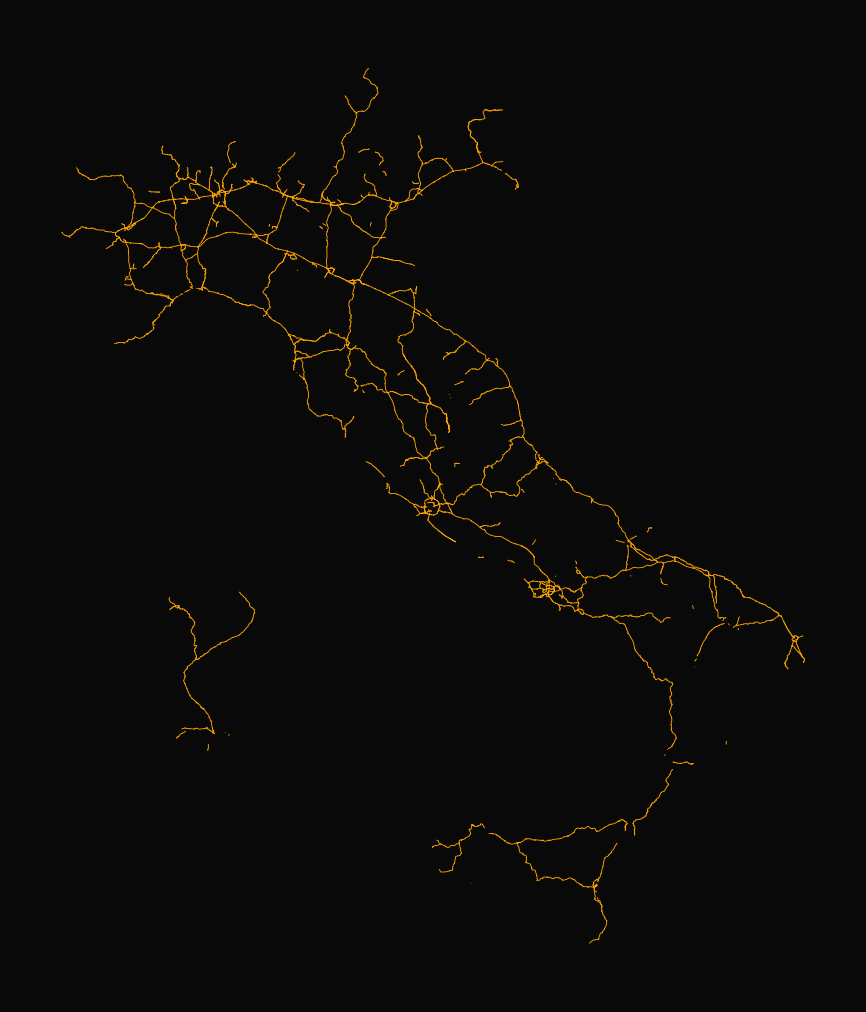

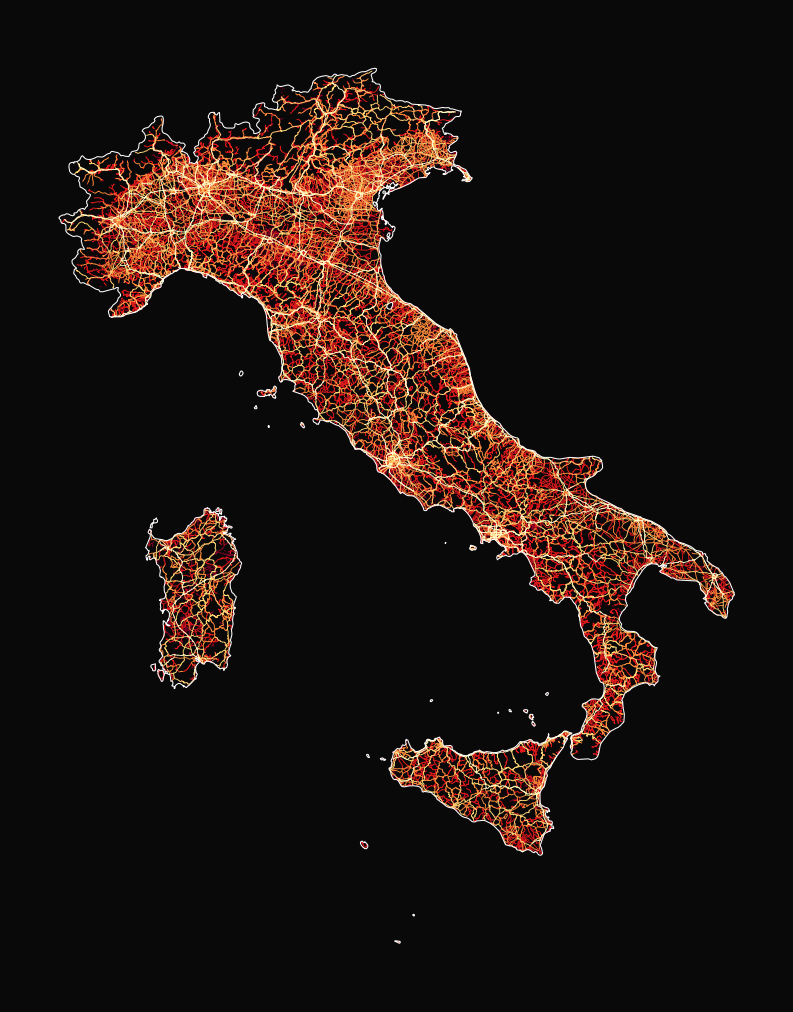

In [44]:
fig, ax = plt.subplots(facecolor='#090909', figsize=(10, 5), dpi=250)
roads.plot(ax=ax, column="GP_RTP", cmap="YlOrRd", lw=0.25)
gdf.boundary.plot(ax=ax, edgecolor='white', linewidth=0.3)  # plot only the edge of the polygon with boundary
ax.axis('off')
plt.show()

### Create a point for roma city

In [35]:
romaPoint = gpd.GeoDataFrame({'geometry': [Point(12.482151, 41.895233)]},
crs="EPSG:4326")


In [36]:
distances = roads.distance(romaPoint.iloc[0].geometry)
roads['distance2rome'] = distances


C:\Users\simon\AppData\Local\Temp\ipykernel_29744\1531149060.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = roads.distance(romaPoint.iloc[0].geometry)


In [37]:
roads['distance2rome_lw'] = 1 / np.exp(roads['distance2rome'])

leftSpan = np.amax(roads['distance2rome_lw']) - np.amin(roads['distance2rome_lw'])
rightSpan = 0.9 - 0.05
valueScaled = (roads['distance2rome_lw']- np.amin(roads['distance2rome_lw'])) / leftSpan
roads['distance2rome_lw'] = 0.05 + (valueScaled * rightSpan)

In [38]:
roads['distance2rome_lw']

2202975    0.050451
2202976    0.050452
2202977    0.050451
2202978    0.050451
2202979    0.050451
             ...   
8762435    0.118395
8762436    0.118609
8762437    0.118576
8762438    0.118530
8762439    0.118530
Name: distance2rome_lw, Length: 596623, dtype: float64

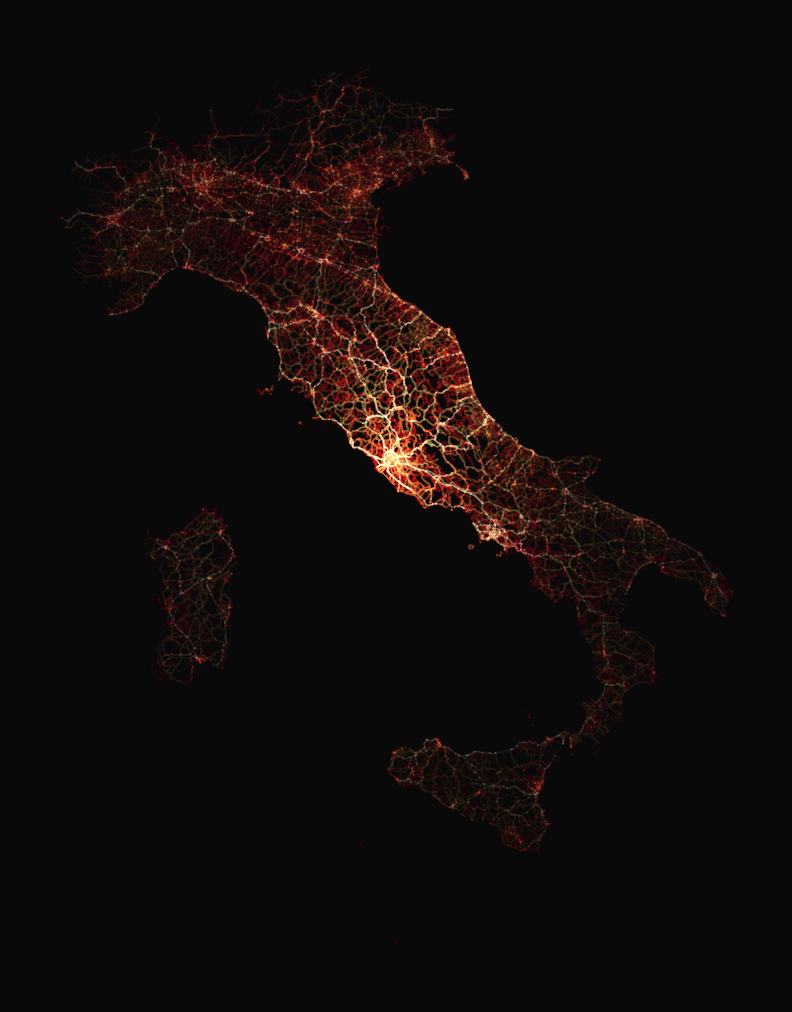

In [39]:
fig, ax = plt.subplots(facecolor='#090909', figsize=(10, 5), dpi=250)

roads.plot(ax=ax, column="GP_RTP", cmap="YlOrRd", lw=0.5, alpha=roads['distance2rome_lw'])
ax.axis('off')

plt.show()

In [ ]:
milanPoint = gpd.GeoDataFrame({'geometry': [Point(9.188321, 45.464762)]},
crs="EPSG:4326")

In [43]:
distances = roads.distance(milanPoint.iloc[0].geometry)
roads['distance2milan'] = distances


C:\Users\simon\AppData\Local\Temp\ipykernel_29744\1856139994.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = roads.distance(milanPoint.iloc[0].geometry)


In [46]:
roads['distance2milan_lw'] = 1 / np.exp(roads['distance2milan'])

leftSpan = np.amax(roads['distance2milan_lw']) - np.amin(roads['distance2milan_lw'])
rightSpan = 0.9 - 0.05
valueScaled = (roads['distance2milan_lw']- np.amin(roads['distance2milan_lw'])) / leftSpan
roads['distance2milan_lw'] = 0.05 + (valueScaled * rightSpan)

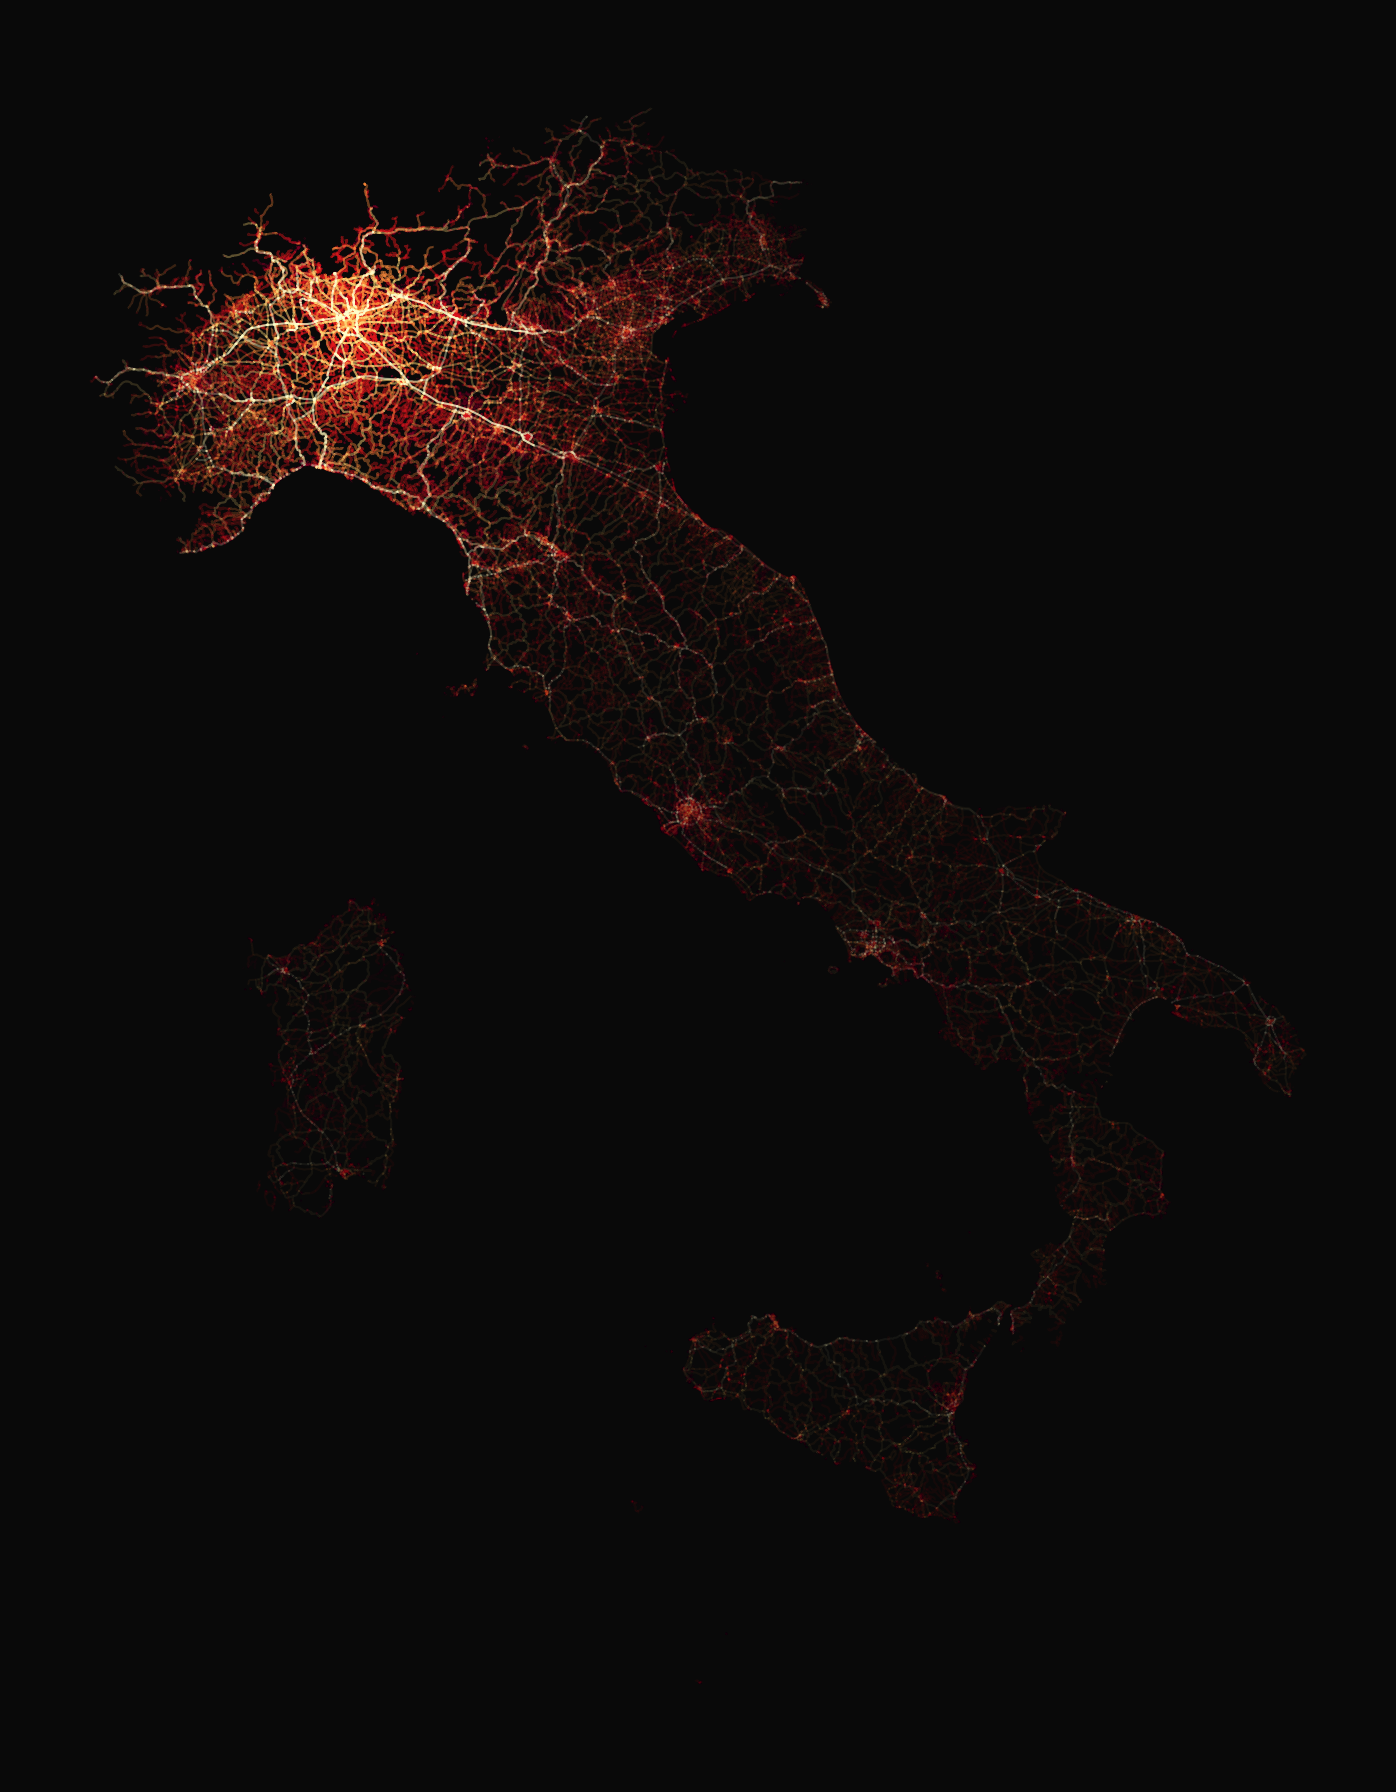

In [47]:
fig, ax = plt.subplots(facecolor='#090909', figsize=(6, 7.5), dpi=300)

roads.plot(ax=ax, column="GP_RTP", cmap="YlOrRd", lw=0.5, alpha=roads['distance2milan_lw'])
ax.axis('off')

plt.show()

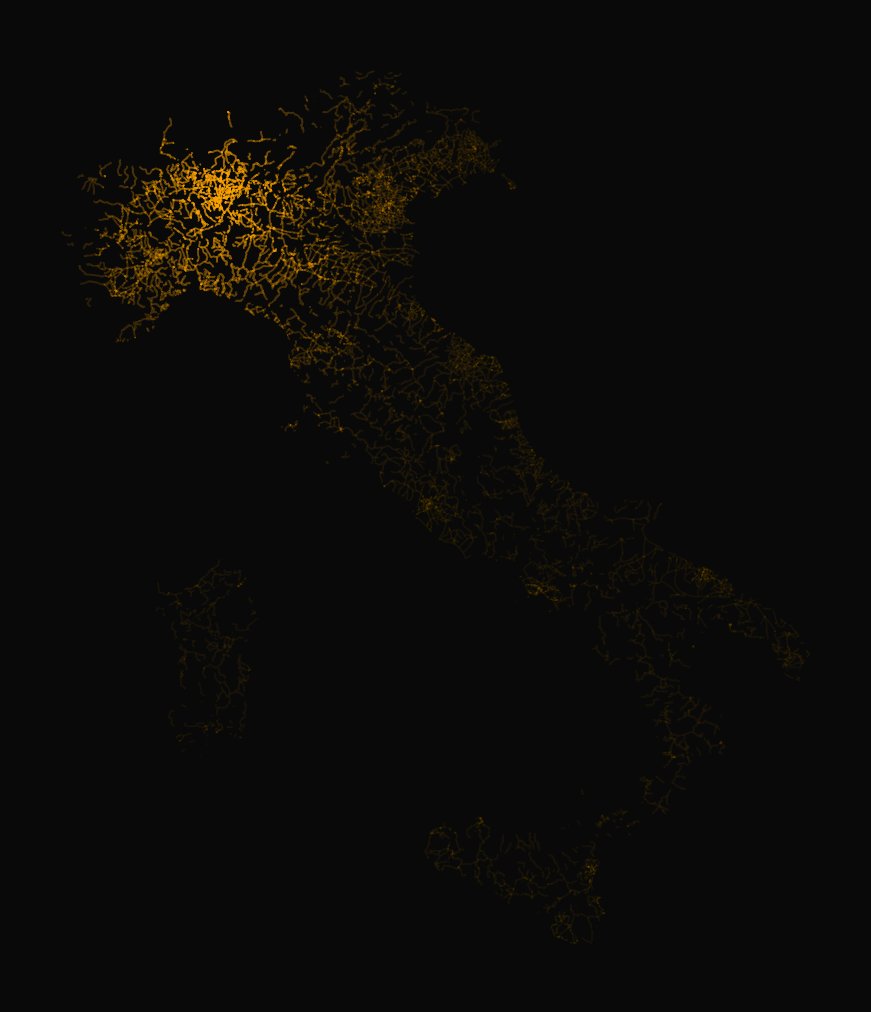

In [30]:
road_filtered = roads[roads["GP_RTP"] == 3]

fig, ax = plt.subplots(facecolor='#090909', figsize=(10, 5), dpi=250)
road_filtered.plot(ax=ax, color="orange", linewidth=0.5, alpha=road_filtered['distance2milan_lw'])
ax.axis('off')
plt.show()